# Clustering

## Run following clustering algorithms for given fonts
1. K-Means
1. Spectral Clustering
1. Agglomerative
1. Mapper - from homework problem - if time permits

## Imports and Globals

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

import font_utils.load_font as LF
import font_utils.upper_lower_numerals as ULN
import plot_utils.plot_font as PU

from collections import namedtuple

## Selected Font/Font Variant

In [6]:

FontSelection = namedtuple('FontSelection', ['name', 'variant', 'style'])
fonts = [
    FontSelection('garamond', 'GARAMOND', 'Old Style'),
    FontSelection('baskerville', 'BASKERVILLE OLD FACE', 'Transitional'),
    FontSelection('bodoni', 'BODONI', 'Modern'),
    FontSelection('arial', 'ARIAL', 'Sans Serif')
]

### Load Font Data Collect For Dim Reduction

In [33]:
uln = ULN.UpperLowerNumerals.get_ascii_codes()

lf = LF.LoadFont('garamond')
font_dict = lf.get_trimmed_font()
font_df = font_dict['GARAMOND']['df']

norm_df = pd.DataFrame(data=[font_df.loc[font_df.m_label == x].iloc[0] for x in uln])
bold_df = pd.DataFrame(data=[font_df.loc[font_df.m_label == x].iloc[1] for x in uln])

label_ar = [chr(x) for x in norm_df.m_label]

df=norm_df.drop(columns=['m_label'])
df=df-df.mean(axis=0)

pca = PCA(n_components=20)
pca.fit(df)

x=df.dot(pca.components_[0])
y=df.dot(pca.components_[1])

reduced_df = pd.DataFrame([x.transpose(), y.transpose()]).transpose()
reduced_df.columns=['x', 'y']

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(reduced_df)
print(f'Labels  : {kmeans.labels_}')
print(f'Centers : {kmeans.cluster_centers_}')

Labels  : [1 2 0 0 0 2 0 2 3 0 2 3 0 2 0 2 0 1 0 1 2 1 1 1 1 1 1 2 0 2 2 2 0 2 3 1 2
 2 1 1 0 2 0 1 0 3 2 1 1 1 1 1 0 3 0 0 1 0 0 1 0 0]
Centers : [[-607.20700521 -515.82827843]
 [ 532.37405536   95.424567  ]
 [-336.02689189  766.05899397]
 [1496.05925445 -666.6082793 ]]


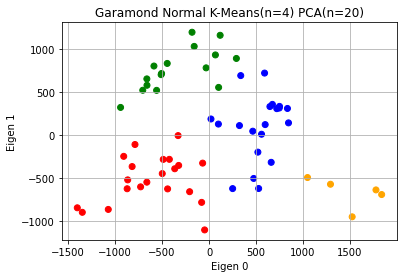

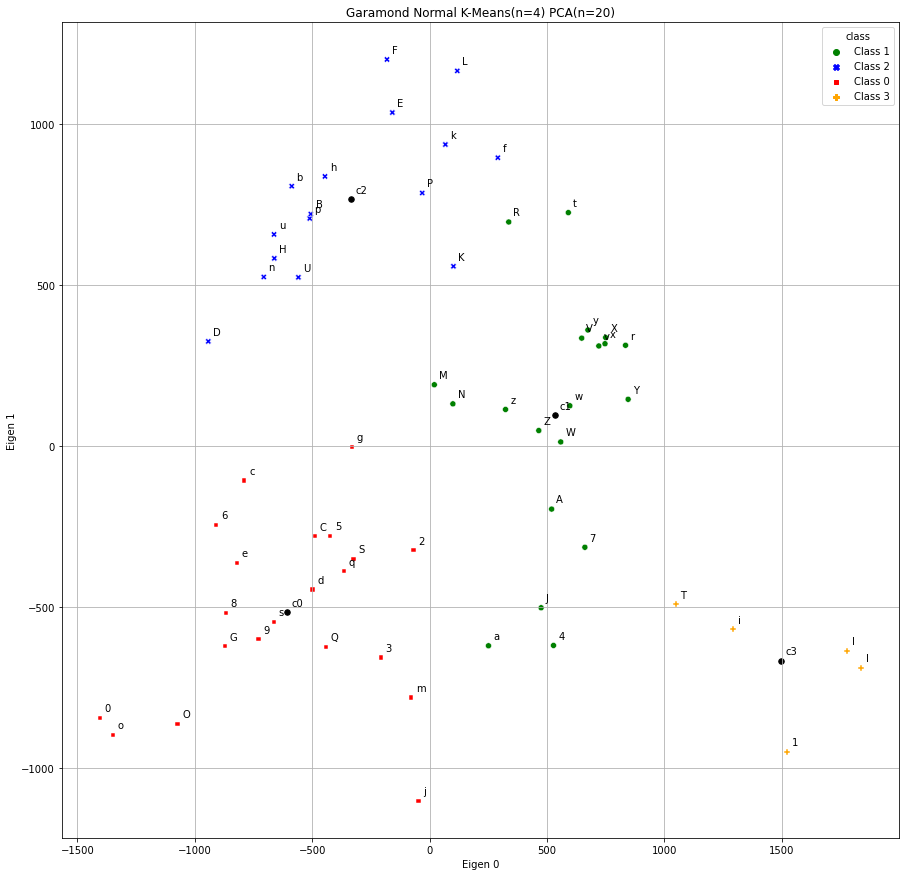

In [41]:
PlotCfg = namedtuple('PlotCfg', ['cluster','color', 'name'])
plot_cfg = [
    PlotCfg(0,'red','Class 0'),
    PlotCfg(1, 'blue', 'Class 1'),
    PlotCfg(2, 'green', 'Class 2'),
    PlotCfg(3, 'orange', 'Class 3')
]

plot_df = pd.DataFrame(
    [
        np.array(kmeans.labels_).transpose(), 
        np.array(label_ar).transpose(),
        x.transpose(), 
        y.transpose()
    ]
).transpose()

plot_df.columns=['c_label', 'm_label', 'x', 'y']

plot_df['color'] = plot_df['c_label'].apply(lambda x: plot_cfg[int(x)].color)
plot_df['class'] = plot_df['c_label'].apply(lambda x: plot_cfg[int(x)].name)

plot_title = 'Garamond Normal K-Means(n=4) PCA(n=20)'
plt.title(plot_title)
plt.xlabel("Eigen 0")
plt.ylabel("Eigen 1")
plt.grid()

plt.scatter(plot_df.x,plot_df.y, c=plot_df.color)

 # Larger Labeled Plot
plt.figure(figsize=(15,15))
sns.scatterplot(
    data=plot_df,
    x='x',
    y='y',
    hue='class',
    style='class',
    palette=['green', 'blue', 'red', 'orange']
)

for i in range(plot_df.shape[0]):
    plt.text(
        x=plot_df.x[i]+20,
        y=plot_df.y[i]+20,
        s=plot_df.m_label[i]
    )

# Show centroids of each cluster
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], s=30, color='black')
for i in range(len(centroids)):
    plt.text(
        x=centroids[i,0]+20,
        y=centroids[i,1]+20,
        s=f'c{i}'
    )

plt.title(plot_title)
plt.xlabel('Eigen 0')
plt.ylabel('Eigen 1')
plt.grid()
plt.show()